In [15]:
import numpy as np
import matplotlib.pyplot as plt

def findR(m_1,m_2,r_1,r_2):
    M = m_1 + m_2
    r_1x, r_1y = r_1
    r_2x, r_2y = r_2

    R_x = (m_1*r_1x + m_2*r_2x)/M
    R_y = (m_1*r_1y + m_2*r_2y)/M
    R = [R_x, R_y]
    return R

def findV(m_1,m_2,v_1,v_2):
    M = m_1 + m_2
    v_1x, v_1y = v_1
    v_2x, v_2y = v_2

    V_x = (m_1*v_1x + m_2*v_2x)/M
    V_y = (m_1*v_1y + m_2*v_2y)/M
    V = [V_x, V_y]
    return V

def findμ(m_1,m_2):
    μ = m_1*m_2/(m_1+m_2)
    return μ

def findx_1(m_1,m_2,R,rel_pos):
    M = m_1 + m_2
    rel_x, rel_y = rel_pos[0], rel_pos[1]
    R_x, R_y = R[0], R[1]

    xs, ys = [], []
    for i in range(0,len(R_x)):
        xs.append(R_x[i] + m_2/M * rel_x[i])
        ys.append(R_y[i] + m_2/M * rel_y[i])
    x_1 = [xs,ys]
    return x_1

def findx_2(m_1,m_2,R,rel_pos):
    M = m_1 + m_2
    rel_x, rel_y = rel_pos[0], rel_pos[1]
    R_x, R_y = R[0], R[1]

    xs, ys = [], []
    for i in range(0,len(R_x)):
        xs.append(R_x[i] - m_1/M * rel_x[i])
        ys.append(R_y[i] - m_1/M * rel_y[i])
    x_2 = [xs,ys]
    return x_2

In [16]:
def twoOrbitals(s_1, s_2, t_max=1000000, dt=10, GR = False):
    # Defining initial states of m_1 and m_2 
    x_1i = s_1[0], s_1[1]
    v_1i = s_1[2], s_1[3]
    m_1 = s_1[4]
    
    x_2i = s_2[0], s_2[1]
    v_2i = s_2[2], s_2[3]
    m_2 = s_2[4]

    # Finding initial center of mass positions and velocities
    Ri = findR(m_1,m_2,x_1i,x_2i)
    Vi = findV(m_1,m_2,v_1i,v_2i)

    # Making array with all instances of time
    ts = np.arange(0,t_max,dt)

    # Finding the position of the center of mass as a function of time
    R_xs, R_ys = [], []
    for t in ts:
        R_x = Vi[0]*t
        R_y = Vi[1]*t
        R_xs.append(R_x)
        R_ys.append(R_y)
        x_cm = [R_xs, R_ys]

    # Finding the initial relative position of the two masses
    rel_xi = np.abs(x_1i[0] - x_2i[0])
    rel_yi = np.abs(x_1i[1] - x_2i[1])
    rel_vxi = np.abs(v_1i[0] - v_2i[0])
    rel_vyi = np.abs(v_1i[1] - v_2i[1])

    s_rel = rel_xi, rel_yi, rel_vxi, rel_vyi

    # Using old orbitals function to calculate relative motion
    rel_pos, rel_vel = orbitals(s_rel, t_max=t_max, dt=dt, d=10, GR=GR)

    x_1 = findx_1(m_1,m_2,x_cm,rel_pos)
    x_2 = findx_2(m_1,m_2,x_cm,rel_pos)

    return x_1, x_2, x_cm, rel_pos, ts




In [17]:
def twoOrbPlotter(x_1, x_2, x_cm, aspect = 1, filename='', CM = False, save = False, show = True):
    if CM == True:
        for i in range(0, len(x_cm[0])):
            x_1[0][i] = x_1[0][i] - x_cm[0][i]
            x_1[1][i] = x_1[1][i] - x_cm[1][i]
            x_2[0][i] = x_2[0][i] - x_cm[0][i]
            x_2[1][i] = x_2[1][i] - x_cm[1][i]
            x_cm[0][i] = 0
            x_cm[1][i] = 0
    
    fig, ax = plt.subplots(figsize=(14,10))

    ax.plot(x_cm[0], x_cm[1], 'r:', lw=0.65,label = 'CM')
    ax.plot(x_cm[0][0], x_cm[1][0], 'r.',markersize=5)
    ax.plot(x_cm[0][-1], x_cm[1][-1], 'r.',markersize=5)

    ax.plot(x_1[0], x_1[1],'k', label = 'm_1', lw = 0.75)
    ax.plot(x_2[0], x_2[1],'k--', label = 'm_2', lw = 0.75)

    ax.set_xlabel('$R_S$', fontsize = 15)
    ax.set_ylabel('$R_S$', fontsize = 15)
    ax.grid(c='grey', alpha=0.2, ls ='--')
    ax.set_aspect('equal')
    ax.set_title(f'{filename}', fontsize = 20)
    ax.legend(facecolor='grey',loc='upper right', fontsize = 12)
    fig.patch.set_facecolor('white')
    fig.tight_layout()
    if show == False:
        plt.close(fig)
    if save == True:
        fig.savefig(f'./Plots/Two_Body/{filename}.png', dpi=300, transparent = False)

In [18]:
# Function that finds the distance to (0.0) given x,y
def distFind(x, y):
    dist = np.sqrt(x**2 + y**2)
    return dist

# Function that finds λ given x,y,vx,vy
def lFind(x, y, vx, vy):
    l = np.abs(vx*y - vy*x)
    return l

# Function that calculates the acceleration given 
def acceleration(x, dist, l, GR = True):
    if GR == True:
        α = - x/(2*dist**3)*(1 + 3*l**2/dist**2)
    else:
        α = - x/(2*dist**3)
    return α

# Function that calculates the velocity after each time step
def boost(v, α, dt):
    vi = v
    vf = vi + α*dt
    return vf

# Function that calculates the position after each time step
def move(x, v, dt):
    xi = x
    xf = xi + v*dt
    return xf

In [19]:
def orbitals(s, t_max = 200000, RS = 1, d=2, GR = True, dt = 100):
    x,y,vx,vy = s
    dist_max = d*distFind(x, y)
    
    xs, ys, vxs, vys = [], [], [], []
    l = lFind(x, y, vx, vy)

    for i in np.arange(0,t_max,dt):
        xs.append(x)
        ys.append(y)
        vxs.append(vx)
        vys.append(vy)

        dist = distFind(x,y)

        if dist >= dist_max:
            break
        elif dist < RS:
                break

        αx = acceleration(x, dist, l, GR)
        αy = acceleration(y, dist, l, GR)

        vx = boost(vx, αx, dt)
        vy = boost(vy, αy, dt)

        x = move(x, vx, dt)
        y = move(y, vy, dt)

    pos = xs, ys
    vel = vxs, vys
    return pos, vel

In [9]:
# finding momentum
def findP(E, α, β, κ=1):
    ρ = np.sqrt(α**2 + β**2)
    P = np.sqrt(2*(E + κ/ρ)/(1 + (β/ρ)**2))
    return P

# Finding momentum at infinity
def findPinf(E, α, β, κ=1):
    ρ = np.sqrt(α**2 + β**2)
    Pinf = np.sqrt(2*E)
    return Pinf

And a function that can plot the orbitals

In [10]:
def findMaxPos(pos):
    xmax, xmin, ymax, ymin = max(pos[0]), min(pos[0]), max(pos[1]), min(pos[1])
    return xmax, xmin, ymax, ymin

# Funktion der plotter en orbital med start- og slutposition og RS givet en liste med positioner
def orbPlotter(pos, filename, RS = 1, GR = False, save = False, show = True):
    start_pos = np.array([pos[0][0], pos[1][0]])
    end_pos = np.array([pos[0][-1], pos[1][-1]])
    
    xmax, xmin, ymax, ymin = findMaxPos(pos)
    max_pos = max(max(abs(start_pos)),max(abs(end_pos)))

    if GR == True:
        body = plt.Circle(xy=(0, 0), radius=RS, color='k')
            
        fig, ax = plt.subplots(figsize=(11,11))
        
        ax.set_xlim(xmin-0.2*max_pos, xmax+0.2*max_pos)
        ax.set_ylim(ymin-0.2*max_pos, ymax+0.2*max_pos)

        ax.plot(pos[0],pos[1], 'k', label = 'Orbital', linewidth=0.75)
        ax.plot(start_pos[0], start_pos[1], 'kx', label = f'Start pos: ({"%.1f" % start_pos[0]}, {"%.1f" % start_pos[1]})')
        ax.plot(end_pos[0],end_pos[1], 'k+', label = f'End pos: ({"%.1f" % end_pos[0]}, {"%.1f" % end_pos[1]})')
        ax.set_xlabel('$R_S$', fontsize = 15)
        ax.set_ylabel('$R_S$', fontsize = 15)
        # ax.set_facecolor('k')
        ax.grid(c='grey', alpha=0.2, ls ='--')
        ax.set_aspect('equal')
        ax.add_artist(body)
        ax.set_title(f'{filename}', fontsize = 20)
        ax.legend(facecolor='grey',loc='upper right', fontsize = 12)

    else:
        body = plt.Circle(xy=(0, 0), radius=RS, color='w')
        
        fig, ax = plt.subplots(figsize=(11,11))
        
        ax.set_xlim(xmin-0.2*max_pos, xmax+0.2*max_pos)
        ax.set_ylim(ymin-0.2*max_pos, ymax+0.2*max_pos)

        ax.plot(pos[0],pos[1], 'w', label = 'Orbital',linewidth=0.75)
        ax.plot(start_pos[0], start_pos[1], 'wx', label = f'Start pos: ({"%.1f" % start_pos[0]}, {"%.1f" % start_pos[1]})')
        ax.plot(end_pos[0],end_pos[1], 'w+', label = f'End pos: ({"%.1f" % end_pos[0]}, {"%.1f" % end_pos[1]})')
        ax.set_xlabel('$R_S$', fontsize = 15)
        ax.set_ylabel('$R_S$', fontsize = 15)
        ax.set_facecolor('k')
        ax.grid(c='grey', alpha=0.2, ls ='--')
        ax.set_aspect('equal')
        ax.add_artist(body)
        ax.set_title(f'{filename}', fontsize = 20)
        ax.legend(facecolor='grey',loc='upper right', fontsize = 12)
    if show == False:
        plt.close(fig)
    if save == True:
        fig.savefig(f'./Plots/{filename}.png', dpi=300)

And a function that plots the orbits in a prettier way

In [11]:
# Funktion der plotter en orbital givet en liste med positioner
def prettyOrbPlotter(pos, filename, RS = 1, GR = False, save = False, show = True):
    start_pos = np.array([pos[0][0], pos[1][0]])
    end_pos = np.array([pos[0][-1], pos[1][-1]])
    
    xmax, xmin, ymax, ymin = findMaxPos(pos)
    max_pos = max(max(abs(start_pos)),max(abs(end_pos)))

    if GR == True:
        body = plt.Circle(xy=(0, 0), radius=RS, color='k')
            
        fig, ax = plt.subplots(figsize=(11,11))
        
        ax.set_xlim(xmin-0.2*max_pos, xmax+0.2*max_pos)
        ax.set_ylim(ymin-0.2*max_pos, ymax+0.2*max_pos)

        ax.plot(pos[0],pos[1], 'k', label = 'Orbital', linewidth=0.75)
        ax.plot(start_pos[0], start_pos[1], 'kx', label = f'Start pos: ({"%.1f" % start_pos[0]}, {"%.1f" % start_pos[1]})')
        ax.plot(end_pos[0],end_pos[1], 'k+', label = f'End pos: ({"%.1f" % end_pos[0]}, {"%.1f" % end_pos[1]})')
        # ax.set_xlabel('$R_S$', fontsize = 15)
        # ax.set_ylabel('$R_S$', fontsize = 15)
        # ax.set_facecolor('k')
        # ax.grid(c='grey', alpha=0.2, ls ='--')
        ax.set_aspect('equal')
        ax.add_artist(body)
        # ax.set_title(f'{filename}', fontsize = 20)
        # ax.legend(facecolor='grey',loc='upper right', fontsize = 12)
        plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

    else:
        body = plt.Circle(xy=(0, 0), radius=RS, color='w')
        
        fig, ax = plt.subplots(figsize=(11,11))
        
        ax.set_xlim(xmin-0.2*max_pos, xmax+0.2*max_pos)
        ax.set_ylim(ymin-0.2*max_pos, ymax+0.2*max_pos)

        ax.plot(pos[0],pos[1], 'w', label = 'Orbital',linewidth=0.5)
        ax.plot(start_pos[0], start_pos[1], 'wx', label = f'Start pos: ({"%.1f" % start_pos[0]}, {"%.1f" % start_pos[1]})')
        ax.plot(end_pos[0],end_pos[1], 'wx', label = f'End pos: ({"%.1f" % end_pos[0]}, {"%.1f" % end_pos[1]})')
        # ax.set_xlabel('$R_S$', fontsize = 15)
        # ax.set_ylabel('$R_S$', fontsize = 15)
        ax.set_facecolor('k')
        # ax.grid(c='grey', alpha=0.2, ls ='--')
        ax.set_aspect('equal')
        ax.add_artist(body)
        # ax.set_title(f'{filename}', fontsize = 20)
        # ax.legend(facecolor='grey',loc='upper right', fontsize = 12)
        plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
    if show == False:
        plt.close(fig)
    if save == True:
        fig.savefig(f'./Plots/Pretty/{filename}.png', dpi=300)


Here we're defining a function that finds the momentum $P$ and $P_\infty$ given an energy $E$ 

# TWO BODY PROBLEM EIH

In [12]:
def rel_len(x_1, x_2):
    return np.sqrt((x_1[0]-x_2[0])**2 + (x_1[1]-x_2[1])**2)

In [58]:
#Takes numpy arrays as input!!

def accelerationEIH(r_1, r_2, v_1, v_2, a_1, a_2, m_1, m_2):
    r_vec = r_1 - r_2
    v_vec = v_1 - v_2
    r = rel_len(r_1,r_2)
    v = rel_len(v_1,v_2)

    acc_1 = np.array([0,0])
    acc_2 = np.array([0,0])
    for j in range(2):
        acc_1[j] = 1/(1 + 3/2*v_1[j]**2 + 3*m_2/r)*(m_2/(2*r)*(-6*v_1[j]*v/r + 7*v_2[j]*v/r + 7*a_2[j]
            + np.dot(a_2, r_vec)*r_vec[j]/r**2 + np.dot(v_2, v_vec)*r_vec[j]/r**2 - v_2[j]*np.dot(v_2, r_vec)/r**2
            - np.dot(v_2, r_vec)*r_vec[j]*v/r**3 + 2*r_vec[j]/r**2 - 3*np.dot(v_1,v_1)*r_vec[j]/r**2
            - 3*np.dot(v_2,v_2)*r_vec[j]/r**2 + 7*np.dot(v_1,v_2)*r_vec[j]/r**2 - np.dot(v_2, r_vec)*np.dot(v_1, r_vec)*r_vec[j]/r**4)
            - v_2[j]*np.dot(v_1, r_vec)/r**2 - 2*(m_1 + m_2)* r_vec[j]/r**3)

        acc_2[j] = 1/(1 + 3/2*v_2[j]**2 + 3*m_1/r)*(m_1/(2*r)*(-6*v_2[j]*v/r + 7*v_1[j]*v/r + 7*a_1[j]
            + np.dot(a_1, r_vec)*r_vec[j]/r**2 + np.dot(v_1, v_vec)*r_vec[j]/r**2 + v_1[j]*np.dot(v_1, r_vec)/r**2
            - np.dot(v_1, r_vec)*r_vec[j]*v/r**3 - 2*r_vec[j]/r**2 + 3*np.dot(v_1,v_1)*r_vec[j]/r**2
            + 3*np.dot(v_2,v_2)*r_vec[j]/r**2 - 7*np.dot(v_1,v_2)*r_vec[j]/r**2 - v_1[j]*np.dot(v_2, r_vec)/r**2 
            + np.dot(v_2, r_vec)*np.dot(v_1, r_vec)*r_vec[j]/r**4) + 2*(m_1 + m_2)*r_vec[j]/r**3)

    return acc_1, acc_2

def boostEIH(v_1, v_2, a_1, a_2, dt):
    v_1 = v_1 + a_1*dt
    v_2 = v_2 + a_2*dt
    return v_1, v_2

def moveEIH(r_1, r_2, v_1, v_2, dt):
    r_1 = r_1 + v_1*dt
    r_2 = r_2 + v_2*dt
    return r_1, r_2


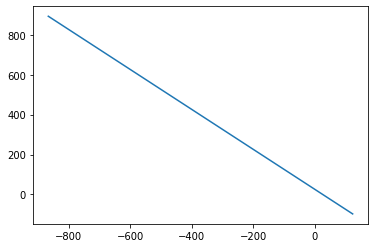

In [109]:
r_1 = np.array([123,-97.4])
r_2 = np.array([-291,223])
v_1 = np.array([-1,1])
v_2 = np.array([2,-2])
a_1 = np.array([1,2])
a_2 = np.array([3,2])
m_1 = 3
m_2 = 5


dt = 10
t = np.arange(0,1000,dt)

pos1 = [], []

for i in t:
    pos1[0].append(r_1[0])
    pos1[1].append(r_1[1])
    # pos2.append(r_2)
    # vel1.append(v_1)
    # vel2.append(v_2)
    # acc1.append(a_1)
    # acc2.append(a_2)
    a_1, a_2 = accelerationEIH(r_1, r_2, v_1, v_2, a_1, a_2, m_1, m_2)
    v_1, v_2 = boostEIH(v_1, v_2, a_1, a_2, dt)
    r_1, r_2 = moveEIH(r_1, r_2, v_1, v_2, dt)
    


plt.plot(pos1[0], pos1[1])


In [107]:
len(pos1)

2